**I tried to make model for testing how often people left bank using Tensorflow. This work isn't something great, mostly I made it to practice my skills with Deep Learning.**

In [2]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
%matplotlib inline

In [3]:
df = pd.read_csv("Churn_Modelling.csv")
df.sample(5)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
4255,4256,15596228,Uwaezuoke,490,France,Male,29,4,0.0,2,1,0,32089.57,0
5659,5660,15638607,Nwabugwu,546,France,Female,52,2,0.0,1,1,0,137332.37,1
4035,4036,15792607,Little,769,France,Female,38,2,0.0,2,0,0,75578.67,0
1387,1388,15674526,Byrne,725,France,Male,66,4,86459.8,1,1,1,141476.56,0
1023,1024,15682639,Marshall,642,France,Male,32,3,0.0,2,1,1,88698.83,0


In [4]:
df.drop(['RowNumber', 'CustomerId', 'Surname'], axis = 1, inplace=True)

In [5]:
df.dtypes

CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


In [7]:
for column in df:
    if column!='CreditScore':
        print(f'{column}: {df[column].unique()}')

Geography: ['France' 'Spain' 'Germany']
Gender: ['Female' 'Male']
Age: [42 41 39 43 44 50 29 27 31 24 34 25 35 45 58 32 38 46 36 33 40 51 61 49
 37 19 66 56 26 21 55 75 22 30 28 65 48 52 57 73 47 54 72 20 67 79 62 53
 80 59 68 23 60 70 63 64 18 82 69 74 71 76 77 88 85 84 78 81 92 83]
Tenure: [ 2  1  8  7  4  6  3 10  5  9  0]
Balance: [     0.    83807.86 159660.8  ...  57369.61  75075.31 130142.79]
NumOfProducts: [1 3 2 4]
HasCrCard: [1 0]
IsActiveMember: [1 0]
EstimatedSalary: [101348.88 112542.58 113931.57 ...  42085.58  92888.52  38190.78]
Exited: [1 0]


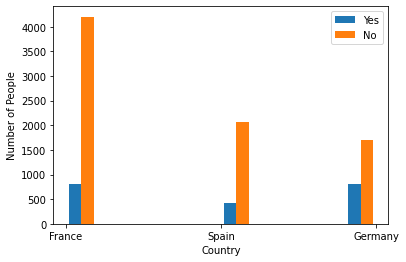

In [8]:
exited_yes= df[df.Exited == 1].Geography
exited_no = df[df.Exited == 0].Geography

plt.hist([exited_yes,exited_no],label=("Yes","No"))
plt.xlabel("Country")
plt.ylabel("Number of People")
plt.legend()

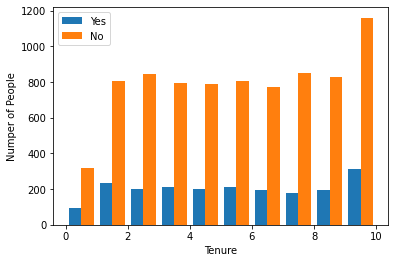

In [9]:
tenure_yes = df[df.Exited==1].Tenure
tenure_no = df[df.Exited==0].Tenure
   
plt.hist([tenure_yes,tenure_no],label=("Yes","No"))
plt.xlabel("Tenure")
plt.ylabel("Numper of People")
plt.legend()

In [10]:
def print_unique_col_values(df):
    for column in df:
        if df[column].dtypes=='object':
            print(f'{column}: {df[column].unique()}')

In [11]:
print_unique_col_values(df)

Geography: ['France' 'Spain' 'Germany']
Gender: ['Female' 'Male']


**Convert categorical values to numeric values with one Hot-encoded**

In [12]:
df['Gender'].replace({'Female':1,'Male':0},inplace=True)

In [13]:
df = pd.get_dummies(data=df, columns=['Geography'])
df.columns

Index(['CreditScore', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts',
       'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Exited',
       'Geography_France', 'Geography_Germany', 'Geography_Spain'],
      dtype='object')

In [14]:
df[['Balance','EstimatedSalary']].describe()

,Balance,EstimatedSalary
count,10000.000000,10000.000000
mean,76485.889288,100090.239881
std,62397.405202,57510.492818
min,0.000000,11.580000
25%,0.000000,51002.110000
50%,97198.540000,100193.915000
75%,127644.240000,149388.247500
max,250898.090000,199992.480000


In [15]:
cols_to_scale = ['Age','CreditScore' , 'Balance', 'EstimatedSalary']

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

df[cols_to_scale] = scaler.fit_transform(df[cols_to_scale])

In [16]:
for col in df:
    print(f'{col}: {df[col].unique()}')

CreditScore: [0.538 0.516 0.304 0.698 1.    0.59  0.944 0.052 0.302 0.668 0.356 0.294
 0.252 0.398 0.57  0.532 0.606 0.474 0.752 0.764 0.572 0.32  0.638 0.992
 0.454 0.812 0.442 0.448 0.122 0.482 0.366 0.406 0.34  0.744 0.25  0.28
 0.908 0.464 0.244 0.23  0.412 0.968 0.62  0.852 0.958 0.574 0.4   0.696
 0.47  0.876 0.61  0.502 0.612 0.75  0.322 0.528 0.784 0.674 0.41  0.506
 0.802 0.462 0.77  0.622 0.65  0.776 0.926 0.614 0.508 0.338 0.628 0.656
 0.814 0.132 0.63  0.854 0.386 0.312 0.286 0.604 0.8   0.758 0.592 0.594
 0.916 0.348 0.838 0.76  0.33  0.846 0.928 0.72  0.126 0.546 0.64  0.544
 0.87  0.51  0.258 0.67  0.376 0.424 0.742 0.556 0.636 0.956 0.648 0.55
 0.164 0.84  0.816 0.89  0.672 0.878 0.478 0.222 0.468 0.458 0.626 0.664
 0.886 0.682 0.27  0.6   0.808 0.37  0.732 0.378 0.712 0.472 0.562 0.734
 0.9   0.666 0.708 0.53  0.634 0.268 0.26  0.456 0.324 0.512 0.494 0.856
 0.328 0.35  0.73  0.46  0.914 0.342 0.818 0.332 0.722 0.536 0.586 0.642
 0.678 0.54  0.652 0.444 0.69  0.484 0.4

In [17]:
df['Exited'].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

**Handling imbalanced data with train test split**

In [18]:
X = df.drop('Exited', axis = 'columns')
y = df['Exited']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=5)

In [19]:
X_train[:10]

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain
7751,0.800,1,0.283784,6,0.000000,2,0,0,0.096273,0,0,1
4154,0.752,0,0.216216,3,0.000000,2,1,0,0.981478,1,0,0
3881,0.476,1,0.621622,3,0.000000,1,1,1,0.948551,1,0,0
9238,0.846,1,0.432432,4,0.000000,2,1,0,0.646869,1,0,0
5210,0.402,0,0.229730,7,0.517012,2,0,0,0.434670,1,0,0
7487,0.602,1,0.513514,4,0.000000,1,0,0,0.421898,1,0,0
7542,0.314,1,0.216216,4,0.000000,2,1,1,0.303413,0,0,1
7524,0.620,1,0.297297,8,0.666330,1,1,1,0.925815,1,0,0
9412,0.750,0,0.108108,6,0.393324,1,0,0,0.668609,1,0,0
6377,0.684,0,0.202703,9,0.000000,1,1,0,0.567526,1,0,0


In [20]:
len(X_train.columns)

12

**ANN Model**

In [21]:
import tensorflow as tf
from tensorflow import keras


model = keras.Sequential([
    keras.layers.Dense(12, input_shape=(12,), activation='relu'),
    keras.layers.Dense(6, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

# opt = keras.optimizers.Adam(learning_rate=0.01)

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=100)

Epoch 1/100
250/250 [==============================] - 3s 5ms/step - loss: 0.5465 - accuracy: 0.7450
Epoch 2/100
250/250 [==============================] - 1s 4ms/step - loss: 0.4749 - accuracy: 0.7966
Epoch 3/100
250/250 [==============================] - 1s 5ms/step - loss: 0.4593 - accuracy: 0.8009
Epoch 4/100
250/250 [==============================] - 1s 5ms/step - loss: 0.4503 - accuracy: 0.8045
Epoch 5/100
250/250 [==============================] - 1s 5ms/step - loss: 0.4412 - accuracy: 0.8081
Epoch 6/100
250/250 [==============================] - 1s 5ms/step - loss: 0.4306 - accuracy: 0.8105
Epoch 7/100
250/250 [==============================] - 1s 5ms/step - loss: 0.4192 - accuracy: 0.8176
Epoch 8/100
250/250 [==============================] - 1s 5ms/step - loss: 0.4098 - accuracy: 0.8205
Epoch 9/100
250/250 [==============================] - 1s 5ms/step - loss: 0.4006 - accuracy: 0.8267
Epoch 10/100
250/250 [==============================] - 1s 5ms/step - loss: 0.3933 - accura

In [22]:
print(f'\n test accuracy : {model.evaluate(X_test, y_test)}')

63/63 [==============================] - 1s 4ms/step - loss: 0.3616 - accuracy: 0.8485

 test accuracy : [0.3615666627883911, 0.8485000133514404]


In [24]:
yp = model.predict(X_test)
yp = np.round(yp)

In [25]:
yp[:5]

array([[0.],
       [0.],
       [0.],
       [0.],
       [0.]], dtype=float32)

In [26]:
y_pred = []
for element in yp:
    if element > 0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)

y_pred[:10]

[0, 0, 0, 0, 0, 0, 0, 0, 0, 1]

In [27]:
y_test[:10]

7054    0
442     0
3954    0
2288    0
3196    0
6178    0
8351    0
5658    1
2065    0
413     1
Name: Exited, dtype: int64

In [28]:
from sklearn.metrics import confusion_matrix , classification_report

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.87      0.95      0.91      1595
           1       0.70      0.44      0.54       405

    accuracy                           0.85      2000
   macro avg       0.79      0.70      0.72      2000
weighted avg       0.84      0.85      0.83      2000



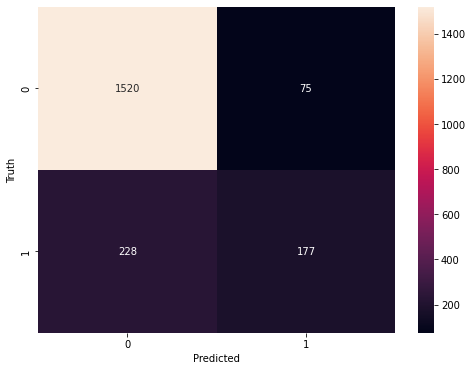

In [29]:
import seaborn as sn
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_pred)

plt.figure(figsize = (8,6))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()

In [30]:
y_test.shape

(2000,)

**MODEL WITH DROPOUT LAYER**

In [36]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.layers import Dropout


modeld = keras.Sequential([
    keras.layers.Dense(12, input_shape=(12,), activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(6, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(3, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(1, activation='sigmoid')
])

# opt = keras.optimizers.Adam(learning_rate=0.01)

modeld.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

modeld.fit(X_train, y_train, epochs=100)

Epoch 1/100
250/250 [==============================] - 2s 6ms/step - loss: 0.7863 - accuracy: 0.6321
Epoch 2/100
250/250 [==============================] - 2s 6ms/step - loss: 0.6252 - accuracy: 0.7719
Epoch 3/100
250/250 [==============================] - 1s 6ms/step - loss: 0.5808 - accuracy: 0.7901
Epoch 4/100
250/250 [==============================] - 1s 6ms/step - loss: 0.5544 - accuracy: 0.7941
Epoch 5/100
250/250 [==============================] - 1s 6ms/step - loss: 0.5356 - accuracy: 0.7960
Epoch 6/100
250/250 [==============================] - 2s 6ms/step - loss: 0.5240 - accuracy: 0.7959
Epoch 7/100
250/250 [==============================] - 1s 5ms/step - loss: 0.5165 - accuracy: 0.7960
Epoch 8/100
250/250 [==============================] - 2s 6ms/step - loss: 0.5119 - accuracy: 0.7959
Epoch 9/100
250/250 [==============================] - 2s 6ms/step - loss: 0.5091 - accuracy: 0.7960
Epoch 10/100
250/250 [==============================] - 1s 6ms/step - loss: 0.5074 - accura

In [37]:
print(f'\n test accuracy : {modeld.evaluate(X_test, y_test)}')

63/63 [==============================] - 1s 6ms/step - loss: 0.4178 - accuracy: 0.8325

 test accuracy : [0.41780728101730347, 0.8324999809265137]


In [38]:
from sklearn.metrics import confusion_matrix , classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.95      0.91      1595
           1       0.70      0.44      0.54       405

    accuracy                           0.85      2000
   macro avg       0.79      0.70      0.72      2000
weighted avg       0.84      0.85      0.83      2000



**LOGISTIC REGRESSION**

In [39]:
 from sklearn.linear_model import LogisticRegression

In [40]:
model1 = LogisticRegression()
model1.fit(X_train,y_train)

pred1 = model1.predict(X_test)

In [41]:
print(classification_report(y_test,pred1))

              precision    recall  f1-score   support

           0       0.82      0.97      0.89      1595
           1       0.57      0.18      0.27       405

    accuracy                           0.81      2000
   macro avg       0.70      0.57      0.58      2000
weighted avg       0.77      0.81      0.76      2000



**KNN**

In [42]:
from sklearn.neighbors import KNeighborsClassifier

In [43]:
model2 = KNeighborsClassifier(n_neighbors=7)
model2.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=7)

In [44]:
pred2 = model2.predict(X_test)
print(classification_report(y_test,pred2))

              precision    recall  f1-score   support

           0       0.83      0.94      0.88      1595
           1       0.51      0.26      0.34       405

    accuracy                           0.80      2000
   macro avg       0.67      0.60      0.61      2000
weighted avg       0.77      0.80      0.77      2000



**SVM**

In [45]:
from sklearn.svm import SVC

In [46]:
model3 = SVC()
model3.fit(X_train,y_train)

SVC()

In [47]:
pred3 = model3.predict(X_test)
print(classification_report(y_test,pred3))

              precision    recall  f1-score   support

           0       0.80      1.00      0.89      1595
           1       1.00      0.04      0.07       405

    accuracy                           0.81      2000
   macro avg       0.90      0.52      0.48      2000
weighted avg       0.84      0.81      0.73      2000



**Sigmoid_ANN > Logistic_Regression = SVM > KNN